# Data Acquisition in Python

---
### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization

In [394]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data and data types using the `head` and `info` function.

In [397]:
#importing the csv dataset
titles = pd.read_csv("titles.csv")
titles.head()

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   

  age_certification  runtime                                       genres  \
0             TV-MA       51                            ['documentation']   
1                 R      114                           ['drama', 'crime']   
2                 R      109  ['drama', 'action', 'thriller', 'european']   
3                PG       91              ['fantasy', 'action', 'comedy']   
4               NaN      150                            ['war', 'action']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0               ['US']      1.0        NaN         NaN         NaN   
1               ['US']      NaN  tt0075314         8.2    808582.0   
2               ['US']      NaN  tt0068473         7.7    107673.0   
3               ['GB']      NaN  tt0071853         8.2    534486.0   
4         ['GB', 'US']      NaN  tt0061578         7.7     72662.0   

   tmdb_popularity  tmdb_score  
0            0.600         NaN  
1           40.965       8.179  
2           10.010       7.300  
3           15.461       7.811  
4           20.398       7.600

In [398]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

Check summary statistics of dataframe using `describe`

In [400]:
titles.describe()

release_year      runtime      seasons   imdb_score    imdb_votes  \
count   5850.000000  5850.000000  2106.000000  5368.000000  5.352000e+03   
mean    2016.417094    76.888889     2.162868     6.510861  2.343938e+04   
std        6.937726    39.002509     2.689041     1.163826  9.582047e+04   
min     1945.000000     0.000000     1.000000     1.500000  5.000000e+00   
25%     2016.000000    44.000000     1.000000     5.800000  5.167500e+02   
50%     2018.000000    83.000000     1.000000     6.600000  2.233500e+03   
75%     2020.000000   104.000000     2.000000     7.300000  9.494000e+03   
max     2022.000000   240.000000    42.000000     9.600000  2.294231e+06   

       tmdb_popularity   tmdb_score  
count      5759.000000  5539.000000  
mean         22.637925     6.829175  
std          81.680263     1.170391  
min           0.009442     0.500000  
25%           2.728500     6.100000  
50%           6.821000     6.900000  
75%          16.590000     7.537500  
max        2274.044000    10.000000

Check for duplicates in titles csv, if there are duplicates we will have to remove them 

In [285]:
#check for duplicates in titles csv, if there are duplicates we will have to remove them 
titles.duplicated().value_counts()

False    5850
dtype: int64

There are no duplicates in the dataset hence do no need to remove them


---

Next let's check the correlations between the variables in the dataset as part of our basic statistical analysis

In [401]:
#correlations b/w different variables in dataset 
corr=titles.corr()
corr.style.background_gradient(cmap='Reds')

Now we shall group the dataset by show id in a descending order with the runtime being the axis 

In [403]:
#group by runtime
titles.groupby('runtime').count().sort_values(by='id',ascending=False)

id  title  type  description  release_year  age_certification  \
runtime                                                                   
24       127    127   127          126           127                106   
90       126    126   126          125           126                 44   
44       102    102   102          101           102                 85   
25        98     98    98           98            98                 88   
95        97     97    97           97            97                 43   
...      ...    ...   ...          ...           ...                ...   
168        1      1     1            1             1                  0   
185        1      1     1            1             1                  1   
154        1      1     1            1             1                  1   
176        1      1     1            1             1                  1   
240        1      1     1            1             1                  1   

         genres  production_countries  seasons  imdb_id  imdb_score  \
runtime                                                               
24          127                   127      113      110         108   
90          126                   126        0      122         120   
44          102                   102       92       90          86   
25           98                    98       90       92          92   
95           97                    97        0       94          93   
...         ...                   ...      ...      ...         ...   
168           1                     1        0        1           1   
185           1                     1        0        1           1   
154           1                     1        0        1           1   
176           1                     1        0        1           1   
240           1                     1        0        1           0   

         imdb_votes  tmdb_popularity  tmdb_score  
runtime                                           
24              108              126         121  
90              120              124         117  
44               86               98          85  
25               92               98          96  
95               93               97          96  
...             ...              ...         ...  
168               1                1           1  
185               1                1           1  
154               1                1           1  
176               1                1           1  
240               0                1           1  

[202 rows x 14 columns]

# Assessment and categorizing shows us the following issue with the data. 

---

### Tidyness issue:
The 'type' variable has several categories in a single observation. There are two types of observations, TV shows and movies, on a single dataset.

### Quality Issue: 
In 2007 netflix started allowing their customer's to stream content online hence we will only be considering the dataset from 2007 to 2022 to avoid any unwanted biases. Moreover the dataset contains data from when Netflix as a company did not exist hence we need to also exclude that data as well

### Plan of Action
Remove all data before 2007, Split current Dataset based on the 2 observations such as movies and shows 

In [404]:
#before we clean the data lets make a copy of it
titles_clean = titles.copy()

In [405]:
titles_clean.head()

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   

  age_certification  runtime                                       genres  \
0             TV-MA       51                            ['documentation']   
1                 R      114                           ['drama', 'crime']   
2                 R      109  ['drama', 'action', 'thriller', 'european']   
3                PG       91              ['fantasy', 'action', 'comedy']   
4               NaN      150                            ['war', 'action']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0               ['US']      1.0        NaN         NaN         NaN   
1               ['US']      NaN  tt0075314         8.2    808582.0   
2               ['US']      NaN  tt0068473         7.7    107673.0   
3               ['GB']      NaN  tt0071853         8.2    534486.0   
4         ['GB', 'US']      NaN  tt0061578         7.7     72662.0   

   tmdb_popularity  tmdb_score  
0            0.600         NaN  
1           40.965       8.179  
2           10.010       7.300  
3           15.461       7.811  
4           20.398       7.600

Removing all the data before 2007, fixing our Quality issue as seen above in the Assessment and Categorizing Section 

In [406]:
#Delete rows based on conditon applied to release year column, exclude all forms of media that has been released before 2007
titles_clean = titles_clean[titles_clean['release_year']>=2007]
titles_clean.head()

id                          title   type  \
216       ts4                   Breaking Bad   SHOW   
218       ts9               The Walking Dead   SHOW   
220   tm74402                       The Mist  MOVIE   
222  ts288536  The Great British Baking Show   SHOW   
224    ts6644                         Borgen   SHOW   

                                           description  release_year  \
216  When Walter White, a New Mexico chemistry teac...          2008   
218  Sheriff's deputy Rick Grimes awakens from a co...          2010   
220  After a violent storm, a dense cloud of mist e...          2007   
222  Bakers attempt three challenges each week tryi...          2010   
224  40-year old political leader Birgitte Nyborg s...          2010   

    age_certification  runtime  \
216             TV-MA       48   
218             TV-MA       46   
220                 R      126   
222             TV-PG       57   
224             TV-MA       58   

                                                genres production_countries  \
216                     ['drama', 'crime', 'thriller']               ['US']   
218  ['action', 'drama', 'scifi', 'horror', 'thrill...               ['US']   
220                    ['horror', 'scifi', 'thriller']               ['US']   
222                            ['reality', 'european']               ['GB']   
224                              ['drama', 'european']               ['DK']   

     seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
216      5.0  tt0903747         9.5   1775990.0          353.848        8.79  
218     11.0  tt1520211         8.2    956604.0          597.277        8.10  
220      NaN  tt0884328         7.1    305346.0           37.369        6.90  
222     12.0  tt1877368         8.6      9856.0            5.581        7.70  
224      4.0  tt1526318         8.5     25485.0           51.118        8.10

In [407]:
titles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5446 entries, 216 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5446 non-null   object 
 1   title                 5445 non-null   object 
 2   type                  5446 non-null   object 
 3   description           5428 non-null   object 
 4   release_year          5446 non-null   int64  
 5   age_certification     2967 non-null   object 
 6   runtime               5446 non-null   int64  
 7   genres                5446 non-null   object 
 8   production_countries  5446 non-null   object 
 9   seasons               2012 non-null   float64
 10  imdb_id               5063 non-null   object 
 11  imdb_score            4986 non-null   float64
 12  imdb_votes            4970 non-null   float64
 13  tmdb_popularity       5360 non-null   float64
 14  tmdb_score            5154 non-null   float64
dtypes: float64(5), int6

The 'type' variable can have several categories per media, we would like to create new variables to be able to extract this and correctly filter the data. We will assume that the first category would be the 'main' category of the movie. This fixes our quality issue.

In [531]:
titles_clean['type1'] = 0
titles_clean['type2'] = 0
titles_clean['type3'] = 0
temp_cat = titles_clean.type.str.split(',')
i=0
start_index = temp_cat.index[0]
for i in temp_cat.index:
    t_cat = temp_cat[i]
    if len(t_cat) == 1:
        titles_clean['type1'][i] = temp_cat[i][0]
        titles_clean['type2'][i] = 0
        titles_clean['type3'][i] = 0
    if len(t_cat) == 2:
        titles_clean['type1'][i] = temp_cat[i][0]
        titles_clean['type2'][i] = temp_cat[i][1]
        titles_clean['type3'][i] = 0
    if len(t_cat) == 3:
        titles_clean['type1'][i] = temp_cat[i][0]
        titles_clean['type2'][i] = temp_cat[i][1]
        titles_clean['type3'][i] = temp_cat[i][2]

C:\Users\Kriti Jain\AppData\Local\Temp\ipykernel_19756\303363504.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_clean['type1'][i] = temp_cat[i][0]
C:\Users\Kriti Jain\AppData\Local\Temp\ipykernel_19756\303363504.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_clean['type2'][i] = 0
C:\Users\Kriti Jain\AppData\Local\Temp\ipykernel_19756\303363504.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_clean['

In [532]:
titles_show = titles_clean[titles_clean.type == 'SHOW']
titles_movie =titles_clean[titles_clean.type == 'MOVIE']

There are two different types of observations in a single data set: TV Shows and Movies. The solution would be to split the dataset into two.

In [415]:
titles_show.head()

id                          title  type  \
216       ts4                   Breaking Bad  SHOW   
218       ts9               The Walking Dead  SHOW   
222  ts288536  The Great British Baking Show  SHOW   
224    ts6644                         Borgen  SHOW   
225    ts8308                      Community  SHOW   

                                           description  release_year  \
216  When Walter White, a New Mexico chemistry teac...          2008   
218  Sheriff's deputy Rick Grimes awakens from a co...          2010   
222  Bakers attempt three challenges each week tryi...          2010   
224  40-year old political leader Birgitte Nyborg s...          2010   
225  Follow the lives of a group of students at wha...          2009   

    age_certification  runtime  \
216             TV-MA       48   
218             TV-MA       46   
222             TV-PG       57   
224             TV-MA       58   
225             TV-PG       23   

                                                genres production_countries  \
216                     ['drama', 'crime', 'thriller']               ['US']   
218  ['action', 'drama', 'scifi', 'horror', 'thrill...               ['US']   
222                            ['reality', 'european']               ['GB']   
224                              ['drama', 'european']               ['DK']   
225                                         ['comedy']               ['US']   

     seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
216      5.0  tt0903747         9.5   1775990.0          353.848        8.79   
218     11.0  tt1520211         8.2    956604.0          597.277        8.10   
222     12.0  tt1877368         8.6      9856.0            5.581        7.70   
224      4.0  tt1526318         8.5     25485.0           51.118        8.10   
225      6.0  tt1439629         8.5    257221.0           42.357        8.00   

    type1  type2  type3  
216  SHOW      0      0  
218  SHOW      0      0  
222  SHOW      0      0  
224  SHOW      0      0  
225  SHOW      0      0

In [416]:
titles_movie.head()

id                        title   type  \
220   tm74402                     The Mist  MOVIE   
237   tm92641                    Inception  MOVIE   
241   tm88465                    Insidious  MOVIE   
246   tm42877                       Wanted  MOVIE   
249  tm997728  Blade Runner: The Final Cut  MOVIE   

                                           description  release_year  \
220  After a violent storm, a dense cloud of mist e...          2007   
237  Cobb, a skilled thief who commits corporate es...          2010   
241  A family discovers that dark spirits have inva...          2010   
246  Doormat Wesley Gibson discovers that his recen...          2008   
249  Visually spectacular, intensely action-packed ...          2007   

    age_certification  runtime                                      genres  \
220                 R      126             ['horror', 'scifi', 'thriller']   
237             PG-13      148    ['action', 'scifi', 'music', 'thriller']   
241             PG-13      103                      ['horror', 'thriller']   
246                 R      110  ['action', 'thriller', 'crime', 'fantasy']   
249                 R      117             ['action', 'thriller', 'scifi']   

    production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
220               ['US']      NaN  tt0884328         7.1    305346.0   
237         ['US', 'GB']      NaN  tt1375666         8.8   2294231.0   
241         ['CA', 'US']      NaN  tt1591095         6.8    303820.0   
246         ['DE', 'US']      NaN  tt0493464         6.7    384995.0   
249               ['US']      NaN        NaN         NaN         NaN   

     tmdb_popularity  tmdb_score  type1  type2  type3  
220        37.369000       6.900  MOVIE      0      0  
237       108.284000       8.400  MOVIE      0      0  
241        99.129000       6.929  MOVIE      0      0  
246        33.101000       6.500  MOVIE      0      0  
249         0.055091       9.000  MOVIE      0      0

In this step we will store the dataframes into individual CSV files.

In [417]:
titles_clean.to_csv('titles_DF_cleaned.csv')
titles_show.to_csv('titles_TV_cleaned.csv')
titles_movie.to_csv('titles_Movie_cleaned.csv')

Data visualisation examples 

What type of media has Netflix produced the most?

In [418]:
plt.figure(figsize=[400,350])
plt.rcParams.update({'font.size':200})#new line of code added, make bar fonts bigger
base_color = sns.color_palette('coolwarm',n_colors=5)
show_movie = sns.countplot(x=titles_clean.release_year, data=titles_clean, hue='type', palette = base_color)
show_movie.set_title("Number of TV Shows and Movies Netflix has released per Year",fontsize = 400)
show_movie.set_xlabel('Year',fontsize = 300)
show_movie.set_ylabel('Number of Movies/Shows',fontsize = 300)
for container in show_movie.containers:
    show_movie.bar_label(container)

It seems like for both TV shows and Movies there has been a steady increase since the start of 20087 the only big drop happening in 2021 possibly due to the economic impact of COVID.

Before 2017, the number of TV Shows and Movies brought to the streaming service was on par. However, after 2017 the company started introducing more movies into the service more than doubling TV Shows in the amount of content.

In [419]:
len(titles_show.groupby('production_countries').count().index)

110

Has Netflix's media classification changed over time?

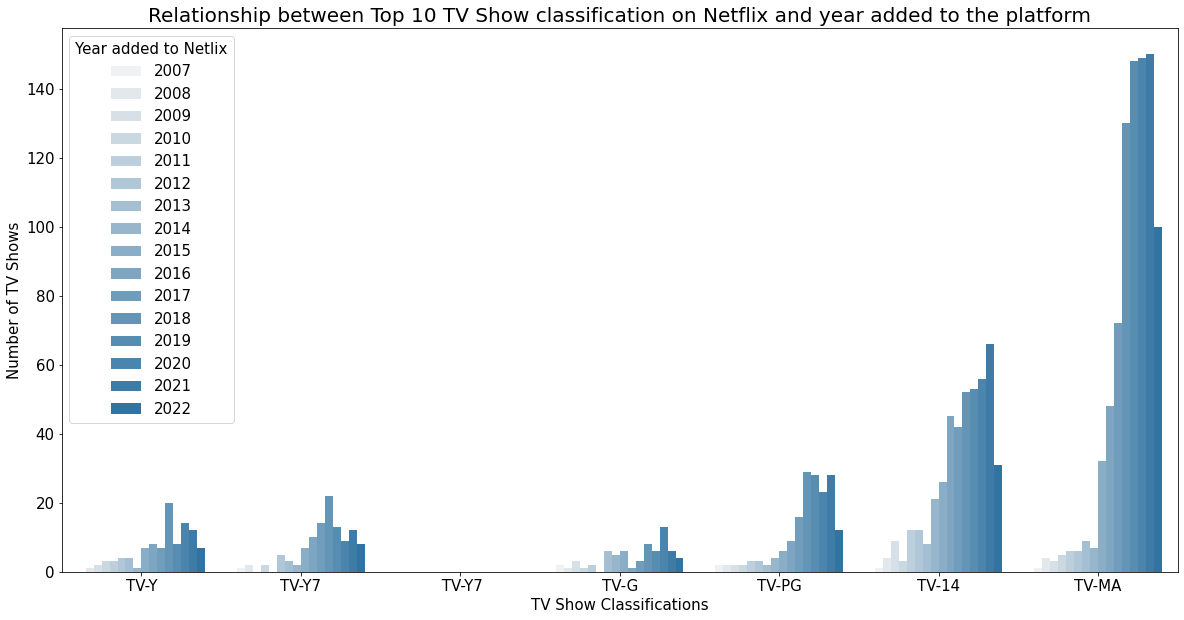

In [420]:
plt.figure(figsize=[20,10])
order = ['TV-Y', 'TV-Y7', ' TV-Y7', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA',]
base_color = base_color = sns.color_palette()[0]
plt.rcParams.update({'font.size':15})#new line of code added, make bar fonts bigger
a=titles_show.release_year
tv_g = sns.countplot(data=titles_show,x='age_certification',hue=a, order=order, color=base_color)
tv_g.set_xlabel('TV Show Classifications',fontsize = 15)
tv_g.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g.set_title("Relationship between Top 10 TV Show classification on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix',)

Most of Netflix's TV shows are categorised as TV-MA (primarily) and TV-14 (secondarily). TV-MA had been steadily increasing up until 2021; whilst in the other hand TV-14 has had a sporadic growth with a decrease starting from 2020 - This possible due to TV Shows pushing their classification to a more mature audience (TV-MA).

The only shows that had a steady increase with no drops whatsoever were the ones classified as TV-G and TV-Y7.

## Linear Regression
 Regression with random test-train split

There are certain values in our dataset that have Nan values(numeric data type used to represent any value that is undefined or unpresentable) or are either infinte. It is not possible to do linear regression with these so we need to drop these values.

Redoing the correlation matrix for the titles_show csv

In [474]:
titles_show = titles_show.dropna()
titles_show.head()

id                          title  type  \
216       ts4                   Breaking Bad  SHOW   
218       ts9               The Walking Dead  SHOW   
222  ts288536  The Great British Baking Show  SHOW   
224    ts6644                         Borgen  SHOW   
225    ts8308                      Community  SHOW   

                                           description  release_year  \
216  When Walter White, a New Mexico chemistry teac...          2008   
218  Sheriff's deputy Rick Grimes awakens from a co...          2010   
222  Bakers attempt three challenges each week tryi...          2010   
224  40-year old political leader Birgitte Nyborg s...          2010   
225  Follow the lives of a group of students at wha...          2009   

    age_certification  runtime  \
216             TV-MA       48   
218             TV-MA       46   
222             TV-PG       57   
224             TV-MA       58   
225             TV-PG       23   

                                                genres production_countries  \
216                     ['drama', 'crime', 'thriller']               ['US']   
218  ['action', 'drama', 'scifi', 'horror', 'thrill...               ['US']   
222                            ['reality', 'european']               ['GB']   
224                              ['drama', 'european']               ['DK']   
225                                         ['comedy']               ['US']   

     seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
216      5.0  tt0903747         9.5   1775990.0          353.848        8.79   
218     11.0  tt1520211         8.2    956604.0          597.277        8.10   
222     12.0  tt1877368         8.6      9856.0            5.581        7.70   
224      4.0  tt1526318         8.5     25485.0           51.118        8.10   
225      6.0  tt1439629         8.5    257221.0           42.357        8.00   

    type1  type2  
216  SHOW      0  
218  SHOW      0  
222  SHOW      0  
224  SHOW      0  
225  SHOW      0

In [475]:
#correlations b/w different variables
corr=titles_show.corr()
corr.style.background_gradient(cmap='Reds')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


### Method 1 of Linear Regression: Manually determining the test train sets

In [452]:
runtime_show = pd.DataFrame(titles_show['runtime']) #predictor
imdb_score_show = pd.DataFrame(titles_show['imdb_score']) #response 

Set up the regression problem with Train and Test datasets.   
Train Set with 600 samples and Test Set with 200 samples.

In [453]:
# Train Set : 600 samples
runtime_train = pd.DataFrame(runtime_show[:600])
imdb_score_train = pd.DataFrame(imdb_score_show[:600])

# Test Set : 200 samples
runtime_test = pd.DataFrame(runtime_show[-200:])
imdb_score_test = pd.DataFrame(imdb_score_show[-200:])

# Check the sample sizes
print("Train Set :",runtime_train.shape, imdb_score_train.shape)
print("Test Set  :", runtime_test.shape, imdb_score_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [454]:
runtime_train.describe()

runtime
count  600.000000
mean    38.370000
std     17.524029
min      0.000000
25%     24.000000
50%     42.000000
75%     48.000000
max    141.000000

In [455]:
imdb_score_train.describe()

imdb_score
count  600.000000
mean     7.304333
std      0.998972
min      3.000000
25%      6.700000
50%      7.500000
75%      8.000000
max      9.500000

<AxesSubplot:>

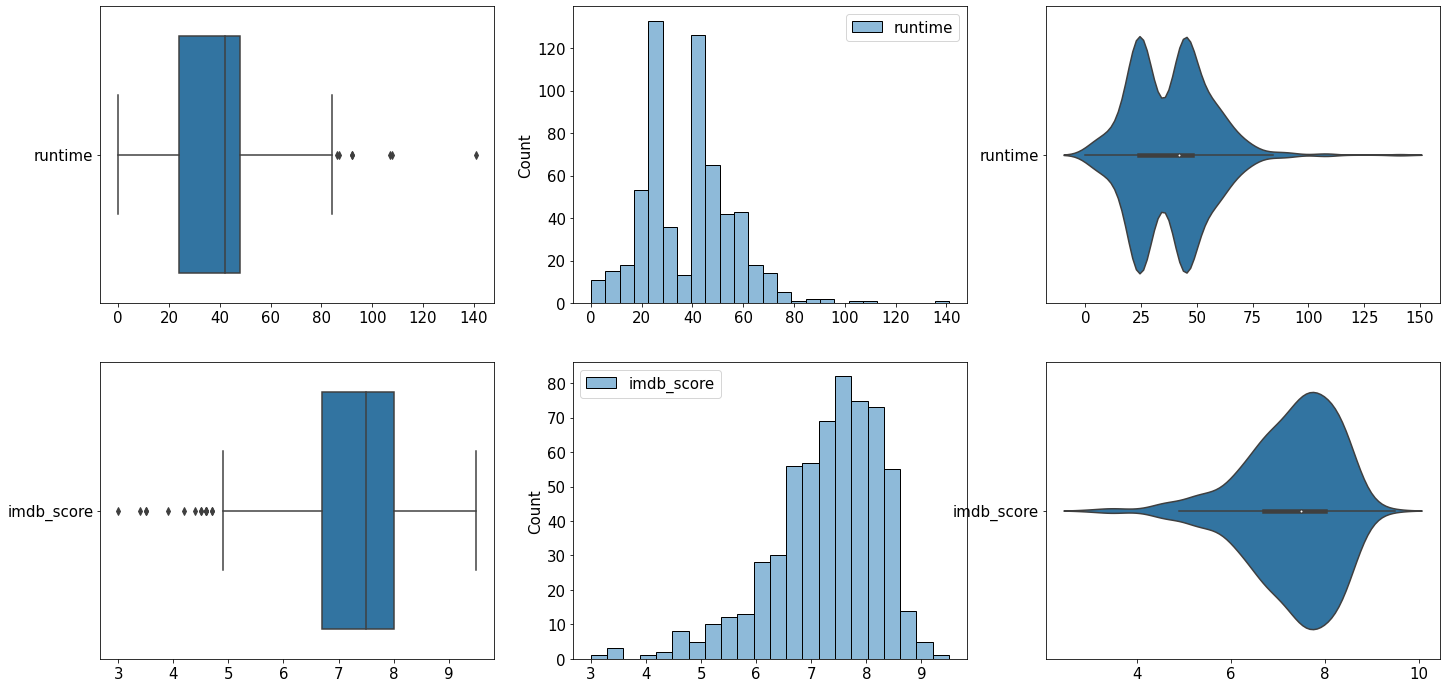

In [456]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sns.boxplot(data = runtime_train, orient = "h", ax = axes[0,0])
sns.histplot(data = runtime_train, ax = axes[0,1])
sns.violinplot(data = runtime_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sns.boxplot(data = imdb_score_train, orient = "h", ax = axes[1,0])
sns.histplot(data = imdb_score_train, ax = axes[1,1])
sns.violinplot(data = imdb_score_train, orient = "h", ax = axes[1,2])

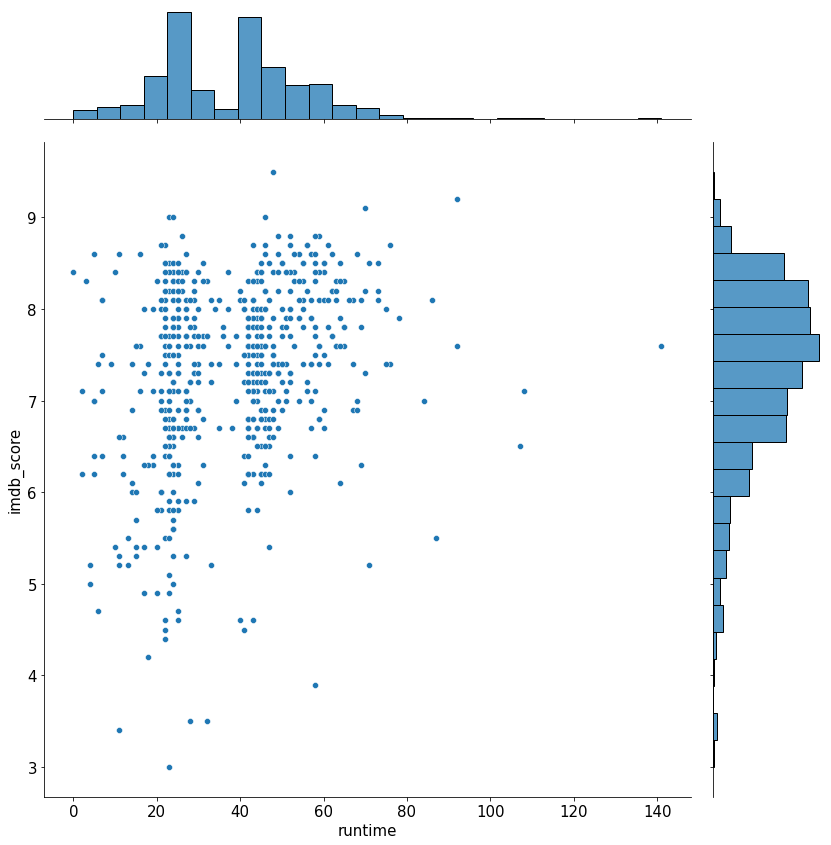

In [457]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([runtime_train, imdb_score_train], axis = 1).reindex(runtime_train.index)

# Jointplot of Total Train against runtime train
sns.jointplot(data = trainDF, x = "runtime", y = "imdb_score", height = 12)

<AxesSubplot:>

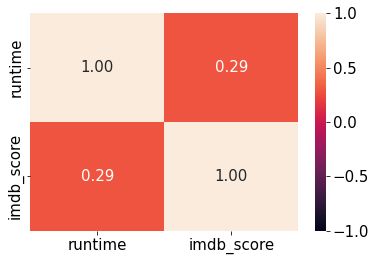

In [458]:
sns.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Linear Regression using Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the `LinearRegression` model from `sklearn.linear_model`.

In [459]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

Train the Linear Regression model `linreg` using the Train Set.   
Use `runtime_train` as *Predictor* and `imdb_score` as *Response*.

In [460]:
# Train the Linear Regression model
linreg.fit(runtime_train, imdb_score_train)

LinearRegression()

You have *trained* the model to fit the following formula.

>  Regression Problem : Total = $a$ $\times$ HP + $b$

Check Intercept ($a$) and Coefficient ($b$) of the regression line.

In [461]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [6.67656863]
Coefficients 	: a =  [[0.01636082]]


Plot the regression line based on the coefficients-intercept form.

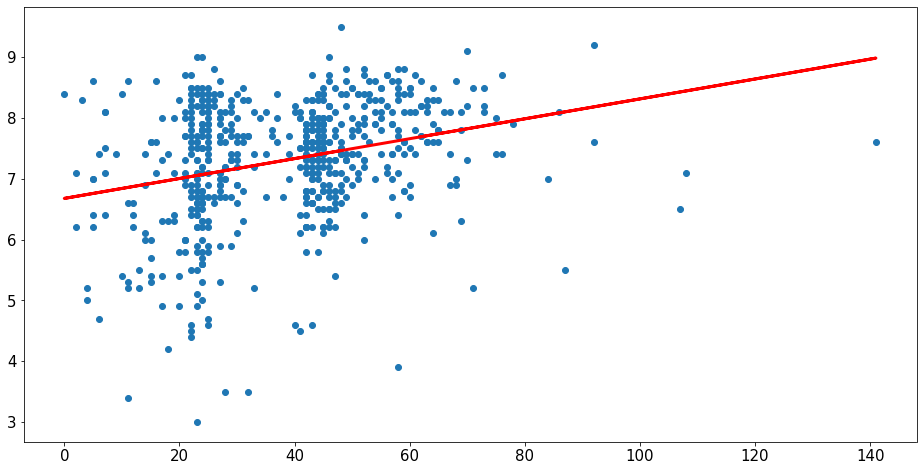

In [462]:
# Formula for the Regression line
regline_x = runtime_train
regline_y = linreg.intercept_ + linreg.coef_ * runtime_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(runtime_train, imdb_score_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

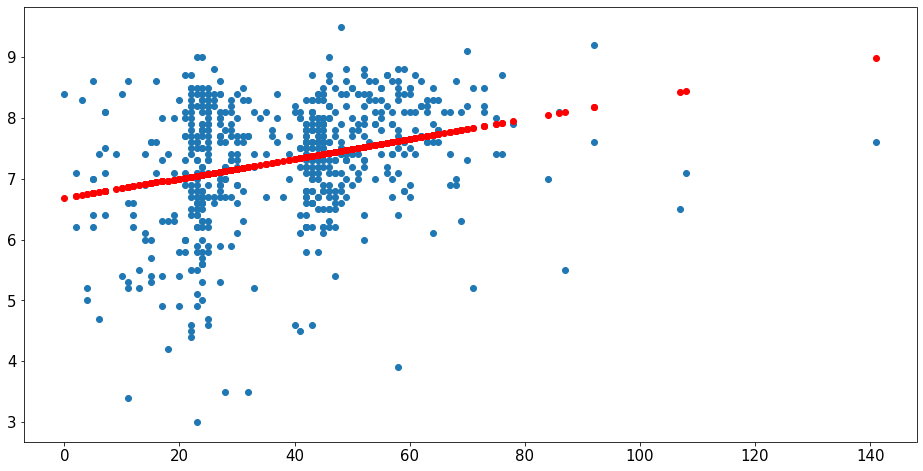

In [463]:
# Predict Total values corresponding to runtime Train
imdb_score_train_pred = linreg.predict(runtime_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(runtime_train, imdb_score_train)
plt.scatter(runtime_train, imdb_score_train_pred, color = "r")
plt.show()

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Explained Variance and Mean Squared Error.

In [464]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(runtime_train, imdb_score_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(imdb_score_train, imdb_score_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.08237050482641717
Mean Squared Error (MSE) 	: 0.9142170349986979
Root Mean Squared Error (RMSE) 	: 0.9561469735342458


Test the Linear Regression model `linreg` using the Test Set.   

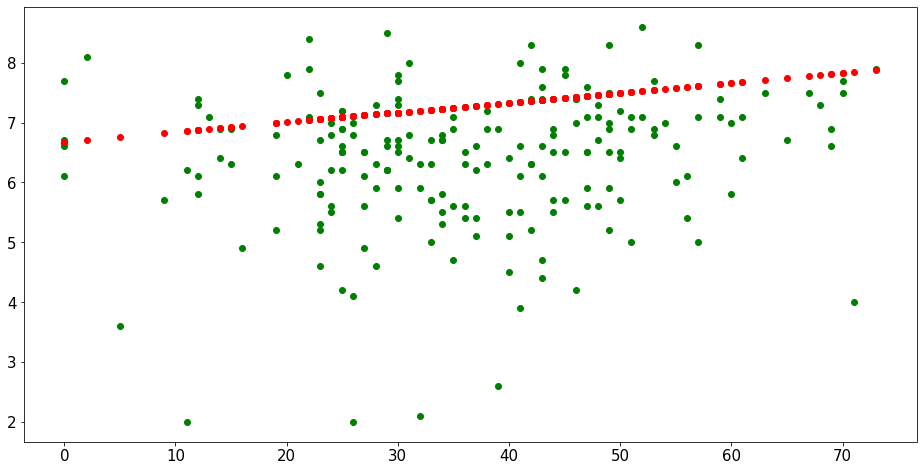

In [465]:
# Predict Total values corresponding to runtime Test
imdb_score_test_pred = linreg.predict(runtime_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(runtime_test, imdb_score_test, color = "green")
plt.scatter(runtime_test, imdb_score_test_pred, color = "red")
plt.show()

Check how good the predictions are on the Test Set.    
Metrics : Explained Variance and Mean Squared Error.

In [245]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(runtime_test, imdb_score_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(imdb_score_test, imdb_score_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: -0.6140667708984344
Mean Squared Error (MSE) 	: 2.076174087406656
Root Mean Squared Error (RMSE) 	: 1.4408935031454115


#### Method 2 of Linear: Regression with Random Train-Test Split

Split the Train and Test sets randomly, and perform Linear Regression.

Intercept of Regression 	: b =  [6.38087205]
Coefficients of Regression 	: a =  [[0.01519986]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06240113337153308
Mean Squared Error (MSE) 	: 1.056973254262075

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.05545754487954735
Mean Squared Error (MSE) 	: 1.0518485935415798



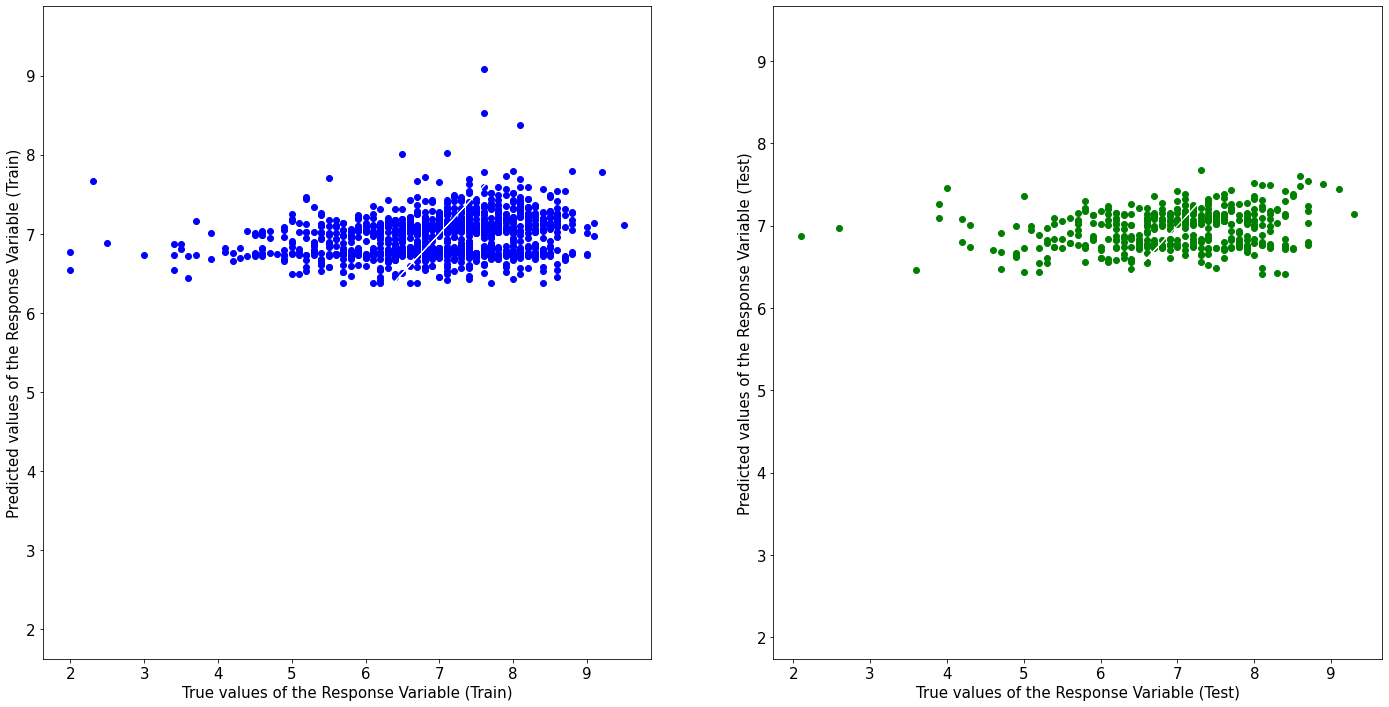

In [467]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the runtime - imdb score Dataset
runtime_show = pd.DataFrame(titles_show['runtime']) #predictor
imdb_score_show = pd.DataFrame(titles_show['imdb_score']) #response 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(runtime_show, imdb_score_show, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to runtime
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Understanding Explained Variance (R^2)
Explained Variance is used to measure the discrepancy between a model and actual data. "Explained", in this case, means expected discrepancy, due to variance in the data itself. A high R^2 suggests a strong sense of correlation and linearity.


# Understanding Mean Squared Error (MSE)
Mean squared error is the squared value of the different between the predicted and actual value. We use this over Mean Absolute Error as squaring errors punishes large errors and forgives small errors. 

# In a nutshell
The Explained Variance (R^2) is used to determine how well a predictor predicts the response variable.

The Mean Squared Error (MSE) is used to determine how well a model is trained.


# Conclusion from Linear Regression
The explained variance in the model trained using fixed dataset is -0.61406. Meanwhile,

the explained variance in the model trained using random dataset is 0.05545.

In both cases, the explained variance is very low. 

The MSE in the model trained using fixed dataset is 0.914 for the training set and 2.07 for the testing set. 

the MSE in the model trained using random dataset is 1.06 for the training set and 1.05 for the testing set. 

The difference in MSE is 

1.156 for the model trained by the fixed dataset and 

0.01 for the model trained by the random dataset.

Thus, we can conclude that runtime is not a good predictor of imdb scores, and the model trained by the random dataset is better than the model trained by the fixed dataset.

In [478]:
titles_show.head()

id                          title  type  \
216       ts4                   Breaking Bad  SHOW   
218       ts9               The Walking Dead  SHOW   
222  ts288536  The Great British Baking Show  SHOW   
224    ts6644                         Borgen  SHOW   
225    ts8308                      Community  SHOW   

                                           description  release_year  \
216  When Walter White, a New Mexico chemistry teac...          2008   
218  Sheriff's deputy Rick Grimes awakens from a co...          2010   
222  Bakers attempt three challenges each week tryi...          2010   
224  40-year old political leader Birgitte Nyborg s...          2010   
225  Follow the lives of a group of students at wha...          2009   

    age_certification  runtime  \
216             TV-MA       48   
218             TV-MA       46   
222             TV-PG       57   
224             TV-MA       58   
225             TV-PG       23   

                                                genres production_countries  \
216                     ['drama', 'crime', 'thriller']               ['US']   
218  ['action', 'drama', 'scifi', 'horror', 'thrill...               ['US']   
222                            ['reality', 'european']               ['GB']   
224                              ['drama', 'european']               ['DK']   
225                                         ['comedy']               ['US']   

     seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
216      5.0  tt0903747         9.5   1775990.0          353.848        8.79   
218     11.0  tt1520211         8.2    956604.0          597.277        8.10   
222     12.0  tt1877368         8.6      9856.0            5.581        7.70   
224      4.0  tt1526318         8.5     25485.0           51.118        8.10   
225      6.0  tt1439629         8.5    257221.0           42.357        8.00   

    type1  type2  
216  SHOW      0  
218  SHOW      0  
222  SHOW      0  
224  SHOW      0  
225  SHOW      0

---

# Classification Tree in Python

We will start by setting up a simple Classification Problem.   

Response Variable : **imdb_watchrecommender**     
Predictor Feature : **runtime**    

Extract the variables and the associated data as a Pandas `DataFrame`.

We are going to do classification tree on the titles_show dataframe. For that we need to first remove any Nan values from the code and then categorize the imdb scores such that if an IMDB score>5 than it is a must watch recommendation.If imdb score<5 than it is a do not watch recommendation.

In [495]:
titles_show['imdbwatchrecommender']=titles_show['imdb_score'].apply(lambda x:'Must Watch' if x>=7 else 'Do no watch')
titles_show.head()

id                          title  type  \
216       ts4                   Breaking Bad  SHOW   
218       ts9               The Walking Dead  SHOW   
222  ts288536  The Great British Baking Show  SHOW   
224    ts6644                         Borgen  SHOW   
225    ts8308                      Community  SHOW   

                                           description  release_year  \
216  When Walter White, a New Mexico chemistry teac...          2008   
218  Sheriff's deputy Rick Grimes awakens from a co...          2010   
222  Bakers attempt three challenges each week tryi...          2010   
224  40-year old political leader Birgitte Nyborg s...          2010   
225  Follow the lives of a group of students at wha...          2009   

    age_certification  runtime  \
216             TV-MA       48   
218             TV-MA       46   
222             TV-PG       57   
224             TV-MA       58   
225             TV-PG       23   

                                                genres production_countries  \
216                     ['drama', 'crime', 'thriller']               ['US']   
218  ['action', 'drama', 'scifi', 'horror', 'thrill...               ['US']   
222                            ['reality', 'european']               ['GB']   
224                              ['drama', 'european']               ['DK']   
225                                         ['comedy']               ['US']   

     seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
216      5.0  tt0903747         9.5   1775990.0          353.848        8.79   
218     11.0  tt1520211         8.2    956604.0          597.277        8.10   
222     12.0  tt1877368         8.6      9856.0            5.581        7.70   
224      4.0  tt1526318         8.5     25485.0           51.118        8.10   
225      6.0  tt1439629         8.5    257221.0           42.357        8.00   

    type1  type2 imdbwatchrecommender  
216  SHOW      0           Must Watch  
218  SHOW      0           Must Watch  
222  SHOW      0           Must Watch  
224  SHOW      0           Must Watch  
225  SHOW      0           Must Watch

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6202849958088852

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6231155778894473



<AxesSubplot:>

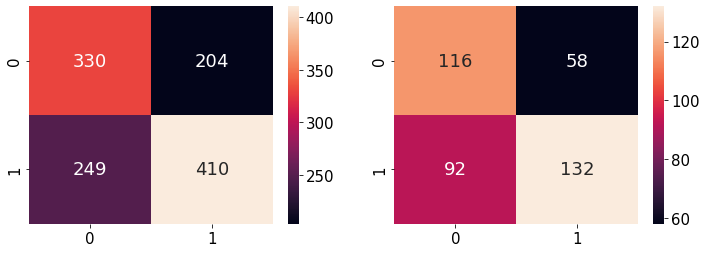

In [525]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the runtime_imbdbswatchrecommender Dataset
runtime_show = pd.DataFrame(titles_show['runtime']) #predictor
imdbwatch_show = pd.DataFrame(titles_show['imdbwatchrecommender']) #response 

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(runtime_show, imdbwatch_show, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 1)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Runtime
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

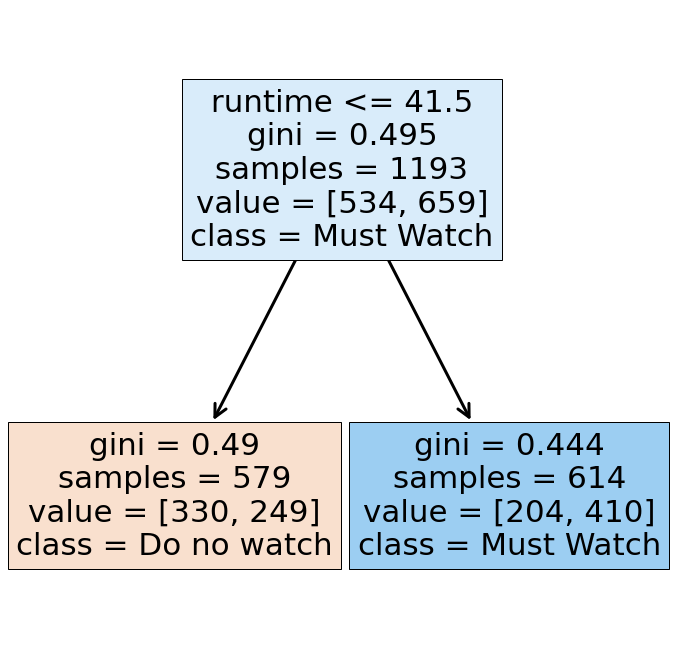

In [526]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

MULTIVARIATE DESCISION TREE

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6705783738474435

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6557788944723618



<AxesSubplot:>

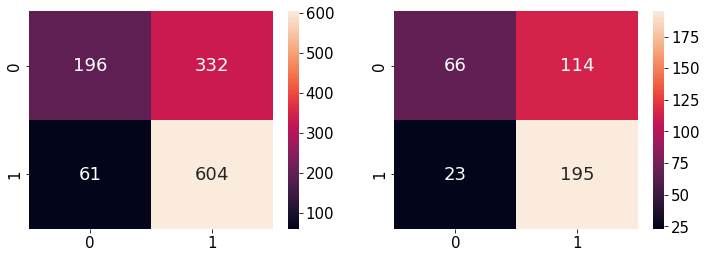

In [529]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(titles_show['imdbwatchrecommender'])
X = pd.DataFrame(titles_show[["runtime","tmdb_score","tmdb_popularity"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

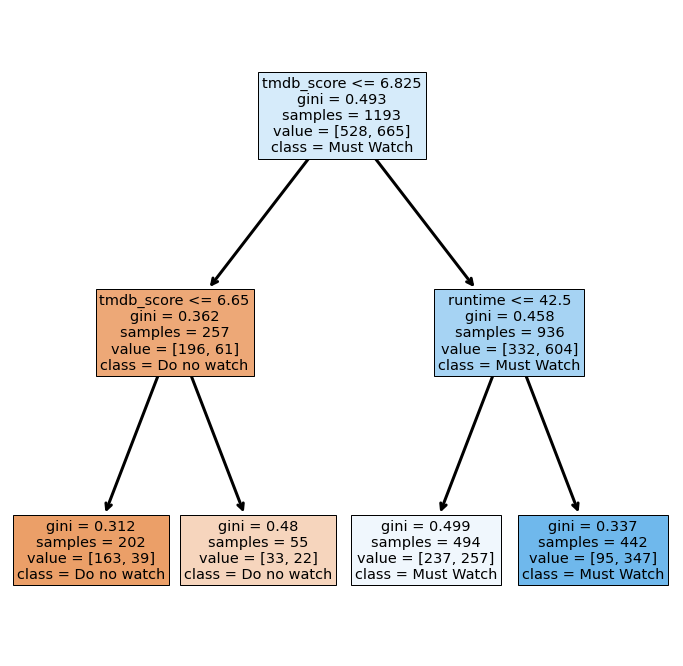

In [530]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Understanding Classification Accuracy
Classification Accuracy is measured by (Number of correct predictions) / (Total number of predictions)

# Understanding Decision Tree
The darker the colour of the box, the more important the predictor is in predicting the response.

The lower the gini index, the more accurate the predictor is in predicting the response.

Thus, we should look for predictors with dark colours and low gini indexes. 

# Conclusion from Classification


---

# Bi-Variate Anomaly Detection
Set up a Bi-Variate Anomaly Detection problem on the titles_show Dataset.
Features to be used for Anomaly Detection : runtime, imdb_score

Note : There is no Predictor or Response (Unsupervised Learning).

In [499]:
titles_show.head()

id                          title  type  \
216       ts4                   Breaking Bad  SHOW   
218       ts9               The Walking Dead  SHOW   
222  ts288536  The Great British Baking Show  SHOW   
224    ts6644                         Borgen  SHOW   
225    ts8308                      Community  SHOW   

                                           description  release_year  \
216  When Walter White, a New Mexico chemistry teac...          2008   
218  Sheriff's deputy Rick Grimes awakens from a co...          2010   
222  Bakers attempt three challenges each week tryi...          2010   
224  40-year old political leader Birgitte Nyborg s...          2010   
225  Follow the lives of a group of students at wha...          2009   

    age_certification  runtime  \
216             TV-MA       48   
218             TV-MA       46   
222             TV-PG       57   
224             TV-MA       58   
225             TV-PG       23   

                                                genres production_countries  \
216                     ['drama', 'crime', 'thriller']               ['US']   
218  ['action', 'drama', 'scifi', 'horror', 'thrill...               ['US']   
222                            ['reality', 'european']               ['GB']   
224                              ['drama', 'european']               ['DK']   
225                                         ['comedy']               ['US']   

     seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
216      5.0  tt0903747         9.5   1775990.0          353.848        8.79   
218     11.0  tt1520211         8.2    956604.0          597.277        8.10   
222     12.0  tt1877368         8.6      9856.0            5.581        7.70   
224      4.0  tt1526318         8.5     25485.0           51.118        8.10   
225      6.0  tt1439629         8.5    257221.0           42.357        8.00   

    type1  type2 imdbwatchrecommender  
216  SHOW      0           Must Watch  
218  SHOW      0           Must Watch  
222  SHOW      0           Must Watch  
224  SHOW      0           Must Watch  
225  SHOW      0           Must Watch

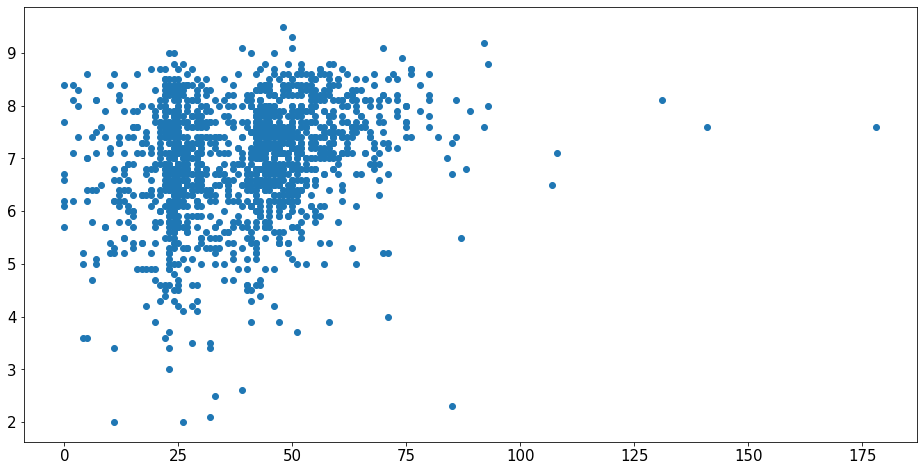

In [500]:
# Extract the Features from the Data
X = pd.DataFrame(titles_show[["runtime", "imdb_score"]])
X = X.dropna()
# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "runtime", y = "imdb_score", data = X)

#### Basic Anomaly Detection

Use the Nearest Neighbors (k-NN) pattern-identification method for detecting Outliers and Anomalies.    
We will use the `LocalOutlierFactor` neighborhood model from `sklearn.neighbors` module.

In [501]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05)

#### Labeling the Anomalies in the Data

We may use the model on the data to `predict` the anomalies.

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

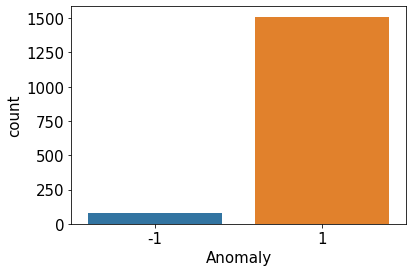

In [502]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sns.countplot(x=X_labeled["Anomaly"])

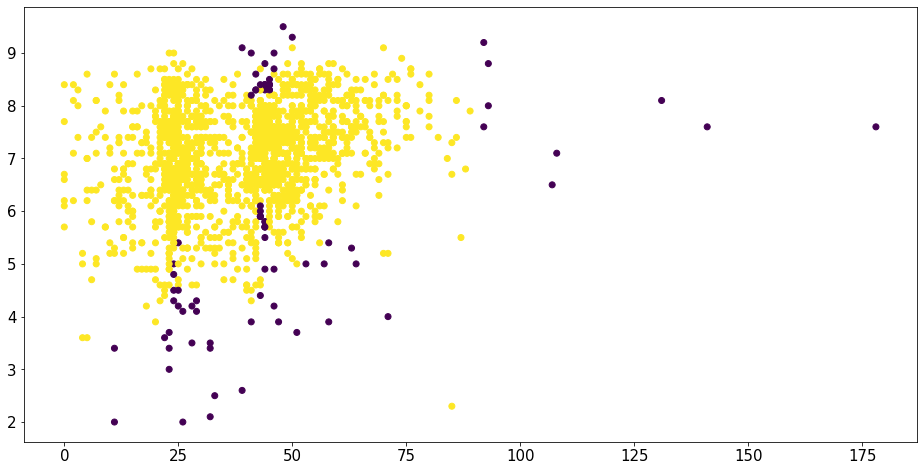

In [503]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "runtime", y = "imdb_score", c = "Anomaly", cmap = 'viridis', data = X_labeled)

# Impact of using different values for k (num_neighbours)

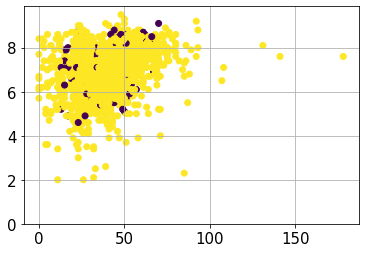

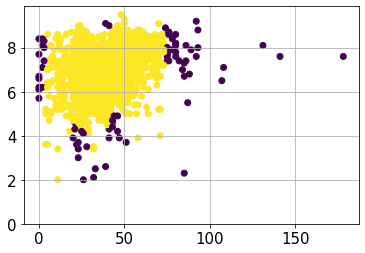

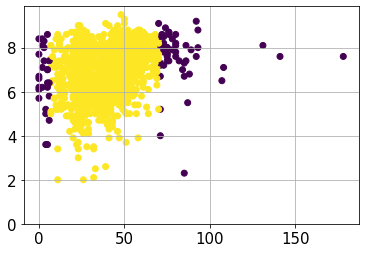

In [508]:
num_neighbors = [1, 100, 1000]

cont_fraction = 0.05    # Fraction of Anomalies

count = 0

for count in range(0, 3):
    # Create Anomaly Detection Model using LocalOutlierFactor
    lof = LocalOutlierFactor(n_neighbors = num_neighbors[count], contamination = cont_fraction)

    # Fit the Model on the Data and Predict Anomalies
    lof.fit(X)

    # Predict the Anomalies
    labels = lof.fit_predict(X)

    # Append Labels to the Data
    X_labeled = X.copy()
    X_labeled["Anomaly"] = pd.Categorical(labels)

    plt.scatter(x = "runtime", y = "imdb_score", c = "Anomaly", cmap = 'viridis', data = X_labeled)
    plt.grid()
    plt.ylim(ymin=0)
    plt.subplots_adjust(hspace = 0.5)
    plt.show()
    
    count += 1

#### Interpret the Anomalies

Try to interpret the anomalies by exploring the Features across them.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='imdb_score', ylabel='Anomaly'>

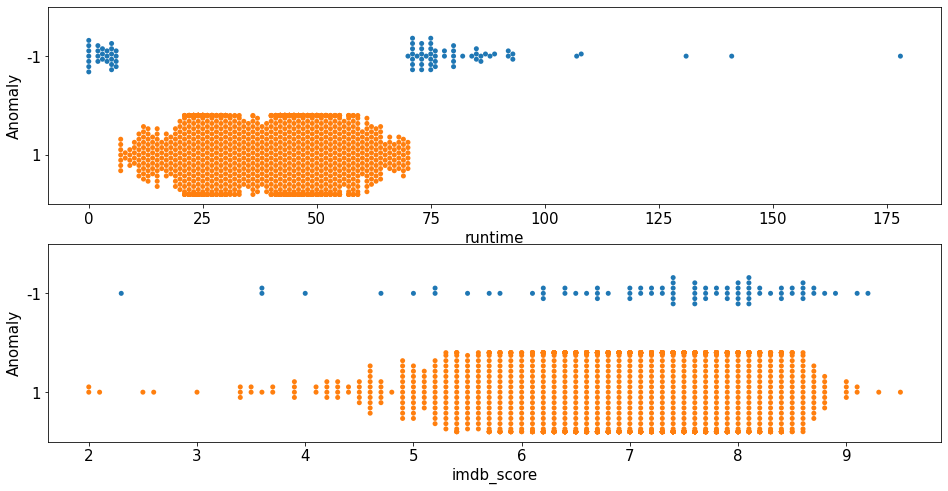

In [505]:
# Boxplots for the Features for the Anomalies
f, axes = plt.subplots(2, 1, figsize=(16,8))
sns.swarmplot(x = 'runtime', y = 'Anomaly', data = X_labeled, ax = axes[0])
sns.swarmplot(x = 'imdb_score', y = 'Anomaly', data = X_labeled, ax = axes[1])

# Understanding the relationship between K and anomalies

The lower your K, the more anomalies there will be present within the data.

The higher your K, the more anomalies there will be present at the outskirts of data.

Thus, you have to carefully tune your K value depending on your desired results.

# At K = 1000...

We can see that the anomalies are mainly distributed according to runtime.

Interpreting from the graph, we can see that

Anomalies = {(Runtime < 10) U (Runtime > 70)} 

This is the reason for the even spread of anomalies in imdb scores.